In [129]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')
# Timer to measure the performance of methods
from time import time

In [130]:
# Generate large equation system with known solution
N = 5000
x = np.random.random(N)
A = np.random.random((N, N))
b = np.dot(A, x)

In [131]:
# numpy.linalg.solve is a wrapper for the
# lapack routines sgesv, dgesv, cgesv and zgesv
# scipy.linalg contain others wrapped routines
# and scipy.linalg.lapack contains wrappers
# of individual lapack routines.
tic = time()
y = np.linalg.solve(A, b)
toc = time()
print('Solving took %s seconds' % (toc - tic))

Solving took 2.8668129444122314 seconds


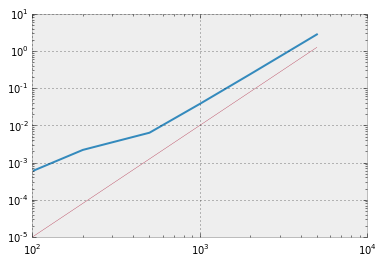

In [132]:
# Solve for a few different sizes and plot time
Ns = [100, 200, 500, 1000, 2000, 5000]
Ts = []
for N in Ns:
    x = np.random.random(N)
    A = np.random.random((N, N))
    b = np.dot(A, x)
    tic = time()
    y = np.linalg.solve(A, b)
    toc = time()
    Ts.append(toc - tic)
plt.plot(Ns, Ts)
# Add straight line (in log-log) to compare slope
plt.plot(Ns, 1e-11*np.array(Ns)**3, lw = 0.3)
plt.xscale('log')
plt.yscale('log')

## Ill-conditioned example

In [133]:
# This is an example of an equation system
# which is ill-conditioned, meaning that
# a small change in the equations will lead
# to a large change in x

A = np.array([
        [1, 2    ],
        [2, 3.999]
    ])

b = np.array([
        [4.000],
        [7.999]
    ])

print(np.linalg.solve(A, b))

[[ 2.]
 [ 1.]]


In [134]:
# Make a small change in b, and see
# what happens to x

A = np.array([
        [1, 2    ],
        [2, 3.999]
    ])

b = np.array([
        [4.001],
        [7.998]
    ])

np.linalg.solve(A, b)

array([[-3.999],
       [ 4.   ]])

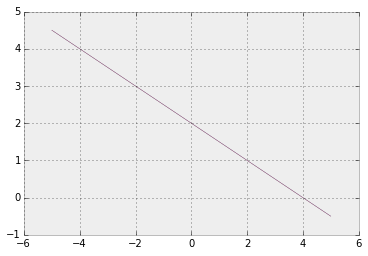

In [135]:
# Plot the two lines corresponding to the two equations
# Geometric interpretation is that the two equations define
# almost parallel lines. A tiny change in on or both lines
# can move the intersection point a large distance.

x0 = np.linspace(-5, 5, 2)
plt.plot(x0, -x0 * A[0,0] / A[0,1] + b[0] / A[0,1], lw = 0.3)
plt.plot(x0, -x0 * A[1,0] / A[1,1] + b[1] / A[1,1], lw = 0.3)

In [136]:
# Condition number gives an indication
np.linalg.cond(A)

24992.00096006945

## Well-conditioned example

In [137]:
# Slightly different equation system

A = np.array([
        [1, 2],
        [2, 3]
    ])

b = np.array([
        [4.000],
        [7.000]
    ])

np.linalg.solve(A, b)

array([[ 2.],
       [ 1.]])

In [138]:
# This time, a small change in b leads to
# a small change in x

A = np.array([
        [1, 2],
        [2, 3]
    ])

b = np.array([
        [4.001],
        [6.999]
    ])

np.linalg.solve(A, b)

array([[ 1.995],
       [ 1.003]])

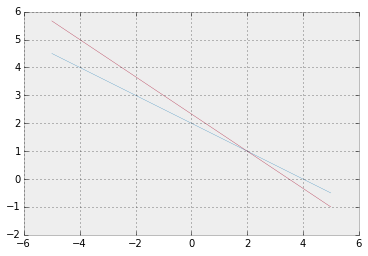

In [139]:
# Plot the two lines corresponding to the two equations
# This time, the lines are further away from being parallel
x0 = np.linspace(-5, 5, 2)
plt.plot(x0, -x0 * A[0,0] / A[0,1] + b[0] / A[0,1], lw = 0.3)
plt.plot(x0, -x0 * A[1,0] / A[1,1] + b[1] / A[1,1], lw = 0.3)

In [140]:
np.linalg.cond(A)

17.944271909999173

## LU decomposition

In [141]:
# Note that np.linalg.solve is just a wrapper
# for lapack routines written in fortran, which
# solve equations using LU-decomposition.
# As a concequence, solving for multiple
# right-hand sides takes essentially no extra time.
N = 5000
x = np.random.random(N)
y = np.random.random(N)
A = np.random.random((N, N))
b = np.dot(A, x)
c = np.dot(A, y)

tic = time()
z = np.linalg.solve(A, b)
toc = time()
print('Solving one system took %s seconds' % (toc - tic))

tic = time()
z = np.linalg.solve(A, np.array([b, c]).T)
toc = time()
print('Solving two systems took %s seconds' % (toc - tic))

Solving one system took 2.6937031745910645 seconds
Solving two systems took 2.675990104675293 seconds
